# Hello world on 2-qubit Bell State

na podstawie instruktażu https://www.youtube.com/watch?v=93-zLTppFZw

## 1. Mapowanie problemu na obwód, bramki i operatorów

Stan Bella = stan Hadamarda na kubicie 1, bramka X na kubicie 2

In [2]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

Drugim krokiem jest zmapowanie do `operatorów`. Aby przekonać się, że program działa poprawnie, będziemy mierzyć stany dla pewnych operatorów 1- lub 2-kubitowych. 

Operatory Pauliego zostaną zaimportowane z biblioteki `qiskit.quantum_info`.

In [1]:
from qiskit.quantum_info import Pauli 

ZZ = Pauli('ZZ')
ZI = Pauli('ZI') # single qubit operator
IZ = Pauli('IZ') # single qubit operator
XX = Pauli('XX')
XI = Pauli('XI') # single qubit operator
IX = Pauli('IX') # single qubit operator

observables = [ZZ, ZI, IZ, XX, XI, IX]

## 2. Optimize
Jeżeli działamy na lokalnym symulatorze, nie ma potrzeby, aby przeprowadzać taką optymalizację związaną z połączeniami kubitów między sobą. 

## 3. Execute on the backend

1. Wskazanie instancji symulatora Aer 
2. Dostęp do symulatora przez `Estimator()`

In [5]:
from qiskit_aer.primitives import Estimator
estimator = Estimator()
job = estimator.run([qc] * len(observables), observables) # run a job, v1 estimator. 
# v2 primitives mają inny syntaks
job.result()

EstimatorResult(values=array([ 1.        , -0.046875  , -0.046875  ,  1.        ,  0.06835938,
        0.06835938]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'time_taken': 0.015304499, 'num_bind_params': 1, 'parallel_state_update': 4, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.0007837, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 7886, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.997802734375, 'simulator_metadata': [{'time_taken': 0.015304499, 'num_bind_params': 1, 'parallel_state_update': 4, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.0007837, 

In [6]:
[qc] * len(observables)

## 4. Postprocessing (and plotting)

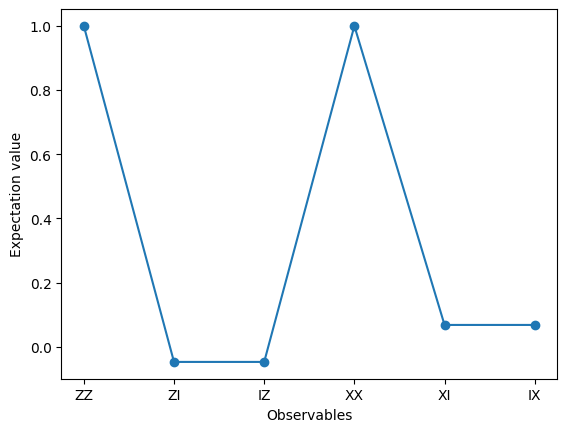

In [7]:
import matplotlib.pyplot as plt

data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX'] # data labels
values = job.result().values # values from the job

plt.plot(data, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Expectation value')
plt.show()


# Extend the Hello World Example to $n$ qubit GHZ state

## Step 1: map the problem to circuits and operators

Funkcja do mapowania stanów w zależności od liczby n

In [8]:
def get_qc_for_n_qbit_GHZ_state(n):
    qc = QuantumCircuit(n)
    qc.h(0)
    for i in range(n-1):
        qc.cx(i, i+1)
    return qc

n = 10
qc = get_qc_for_n_qbit_GHZ_state(n)
qc.draw()

┌───┐                                             
q_0: ┤ H ├──■──────────────────────────────────────────
     └───┘┌─┴─┐                                        
q_1: ─────┤ X ├──■─────────────────────────────────────
          └───┘┌─┴─┐                                   
q_2: ──────────┤ X ├──■────────────────────────────────
               └───┘┌─┴─┐                              
q_3: ───────────────┤ X ├──■───────────────────────────
                    └───┘┌─┴─┐                         
q_4: ────────────────────┤ X ├──■──────────────────────
                         └───┘┌─┴─┐                    
q_5: ─────────────────────────┤ X ├──■─────────────────
                              └───┘┌─┴─┐               
q_6: ──────────────────────────────┤ X ├──■────────────
                                   └───┘┌─┴─┐          
q_7: ───────────────────────────────────┤ X ├──■───────
                                        └───┘┌─┴─┐     
q_8: ────────────────────────────────────────┤ X ├──■──
                                             └───┘┌─┴─┐
q_9: ─────────────────────────────────────────────┤ X ├
                                                  └───┘

In [10]:
n = 100
qc = get_qc_for_n_qbit_GHZ_state(n)


Look at the correlations as they go far away from each other, ZZ operator as they go away.
As qubits go far away from each other, there is more and more noise between them.

We want to create operators to probe the noise between the qubits as the distance grows.   

In [11]:
from qiskit.quantum_info import SparsePauliOp

operator_strings = ['Z'+ 'I' * i + 'Z' + 'I' * (n-2-i) for i in range(n-1)]
print(operator_strings)
print(len(operator_strings))

operators = [SparsePauliOp(operator_string) for operator_string in operator_strings]

['ZZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

## Step 2. Optimize problem for quantum execution

Transpilation 

In [12]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager # transpilator

backend_name = 'ibm_brisbane' #127 device
# backends: https://quantum.ibm.com/services/resources
backend = QiskitRuntimeService().get_backend(backend_name)
pass_manager = generate_preset_pass_manager(optimization_level=1 , backend=backend) # optimization level
qc_transpiled = pass_manager.run(qc)


In [15]:
# qc_transpiled.draw()

Układ operatorów powinien być zgodny z układem transpilowanego obwodu

In [13]:
operators_transpiled_list = [op.apply_layout(qc_transpiled.layout) for op in operators]

## Step 3. Execute on the backend

In [21]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import EstimatorOptions

options = EstimatorOptions()
options.resilience_level = 1 
options.optimization_level = 0 # transpilation already done
options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = 'XY4'

estimator = Estimator(backend, options = options)
job = estimator.run([(qc_transpiled, operators_transpiled_list)])
job_id = job.job_id()
print(job_id)

cs2jnne965y000853y90


# Step 4. Post processing and plotting

In [14]:
job_id = 'cs2jnne965y000853y90'
service = QiskitRuntimeService()
job = service.job(job_id)

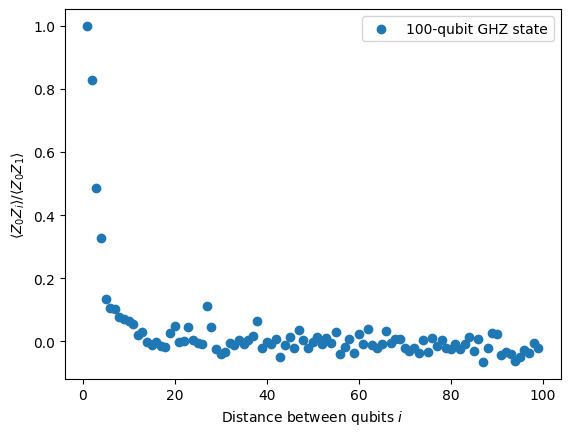

In [15]:
import matplotlib.pyplot as plt

data = list(range(1, len(operators)+1))
result = job.result()[0]
values = result.data.evs
values = [v / values[0] for v in values]

plt.scatter(data, values, marker='o', label='100-qubit GHZ state')
plt.xlabel('Distance between qubits $i$')
plt.ylabel(r'$\langle Z_0 Z_i \rangle / \langle Z_0 Z_1 \rangle$')
plt.legend()
plt.show()